In [308]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_columns", None)
games = pd.read_csv("../data/processed/adv_nba_data.csv")

games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_TEAM,POSS,OFF_RTG,TS_PCT,EFG_PCT,A_TO_RATIO,TO_PCT,FT_RATE,WIN_FLAG,REST_DAYS,B2B,WIN_FLAG_SHIFTED,WIN_STREAK,OFF_RTG_L10,EFG_PCT_L10,TS_PCT_L10,TO_PCT_L10,FT_RATE_L10,REB_L10,A_TO_RATIO_L10,WIN_FLAG_L10,BLK_L10,STL_L10,OREB_L10,PF_L10,POSS_L10,PLUS_MINUS_L10,SEASON_ID_OPP,TEAM_ID_OPP,TEAM_ABBREVIATION_OPP,TEAM_NAME_OPP,GAME_DATE_OPP,MATCHUP_OPP,WL_OPP,MIN_OPP,PTS_OPP,FGM_OPP,FGA_OPP,FG_PCT_OPP,FG3M_OPP,FG3A_OPP,FG3_PCT_OPP,FTM_OPP,FTA_OPP,FT_PCT_OPP,OREB_OPP,DREB_OPP,REB_OPP,AST_OPP,STL_OPP,BLK_OPP,TOV_OPP,PF_OPP,PLUS_MINUS_OPP,HOME_TEAM_OPP,POSS_OPP,OFF_RTG_OPP,TS_PCT_OPP,EFG_PCT_OPP,A_TO_RATIO_OPP,TO_PCT_OPP,FT_RATE_OPP,WIN_FLAG_OPP,REST_DAYS_OPP,B2B_OPP,WIN_FLAG_SHIFTED_OPP,WIN_STREAK_OPP,OFF_RTG_L10_OPP,EFG_PCT_L10_OPP,TS_PCT_L10_OPP,TO_PCT_L10_OPP,FT_RATE_L10_OPP,REB_L10_OPP,A_TO_RATIO_L10_OPP,WIN_FLAG_L10_OPP,BLK_L10_OPP,STL_L10_OPP,OREB_L10_OPP,PF_L10_OPP,POSS_L10_OPP,PLUS_MINUS_L10_OPP,DEF_RTG,NET_RTG,DEF_RTG_OPP,NET_RTG_OPP,TS_DIFF,DEF_RTG_L10,DEF_RTG_L10_OPP,NET_RTG_L10,NET_RTG_L10_OPP
0,22025,1610612737,ATL,Atlanta Hawks,22501217,2025-12-14,ATL vs. PHI,W,240,120,43,99,0.434,17,33.0,0.515,17,21,0.810,18.0,39.0,57.0,33,8.0,6,16,23,3.0,1,101.9904,117.658133,0.554324,0.520202,2.062500,0.128783,0.212121,1,2.0,0,0.0,0,118.065223,0.552028,0.582113,0.118280,0.219959,41.8,2.576264,0.5,4.8,9.1,10.7,19.3,100.20096,-2.1,22025,1610612755,PHI,Philadelphia 76ers,2025-12-14,PHI @ ATL,L,240,117,38,101,0.376,17,41.0,0.415,24,29,0.828,21.0,33.0,54.0,25,10.0,10,11,15,-3.0,1,99.6096,117.458558,0.514241,0.460396,2.272727,0.088169,0.287129,0,2.0,0,1.0,1,114.110054,0.512907,0.558838,0.117492,0.270578,46.8,2.040757,0.6,5.4,9.2,11.7,19.9,101.05728,0.3,117.458558,0.199574,117.658133,-0.199574,0.040083,119.908722,118.065223,-1.843499,-3.955170
1,22025,1610612737,ATL,Atlanta Hawks,22501210,2025-12-12,ATL @ DET,L,241,115,39,85,0.459,11,36.0,0.306,26,31,0.839,13.0,24.0,37.0,28,9.0,8,20,18,-27.0,0,101.4144,113.396125,0.582928,0.523529,1.400000,0.168577,0.364706,0,6.0,0,1.0,1,119.503064,0.567491,0.591766,0.116139,0.198431,42.0,2.623764,0.5,4.6,8.9,10.0,19.9,99.92064,-0.3,22025,1610612765,DET,Detroit Pistons,2025-12-12,DET vs. ATL,W,240,142,53,91,0.582,12,29.0,0.414,24,29,0.828,10.0,30.0,40.0,34,16.0,6,12,22,27.0,0,101.5296,139.860691,0.684271,0.648352,2.833333,0.103663,0.318681,1,6.0,0,1.0,2,119.822394,0.555644,0.597163,0.139895,0.351831,45.8,1.650042,0.7,5.7,8.5,12.8,21.7,99.06048,3.8,139.860691,-26.464566,113.396125,26.464566,-0.101344,119.418334,119.503064,0.084730,0.319330
2,22025,1610612737,ATL,Atlanta Hawks,22500351,2025-12-06,ATL @ WAS,W,241,131,52,98,0.531,13,39.0,0.333,14,14,1.000,15.0,30.0,45.0,36,13.0,4,12,16,15.0,0,97.1136,134.893568,0.628840,0.596939,3.000000,0.103306,0.142857,1,1.0,1,0.0,0,117.727228,0.564694,0.588711,0.121179,0.201386,41.0,2.506117,0.4,4.7,8.5,9.6,20.7,99.77088,-2.6,22025,1610612764,WAS,Washington Wizards,2025-12-06,WAS vs. ATL,L,240,116,41,80,0.513,17,38.0,0.447,17,19,0.895,4.0,22.0,26.0,29,6.0,5,20,18,-15.0,0,100.1856,115.785103,0.656406,0.618750,1.450000,0.184570,0.237500,0,2.0,0,0.0,0,113.221856,0.531049,0.563013,0.127056,0.244813,40.6,1.854216,0.2,5.6,7.5,10.8,20.8,97.68960,-16.3,115.785103,19.108465,134.893568,-19.108465,-0.027565,120.522454,117.727228,-2.795226,-4.505372
3,22025,1610612737,ATL,Atlanta Hawks,22500340,2025-12-05,ATL vs. DEN,L,241,133,49,95,0.516,20,46.0,0.435,15,16,0.938,11.0,34.0,45.0,35,8.0,2,12,25,-1.0,1,98.9184,134.454257,0.651705,0.621053,2.916667,0.105226,0.168421,0,2.0,0,0.0,0,116.754443,0.563765,0.588422,0.125759,0.212779,39.9,2.420332,0.5,4.8,8.8,9.4,20.1,99.82080,-2.3,22025,1610612743,DEN,Denver Nuggets,2025-12-05,DEN @ ATL,W,239,134,47,89,0.528,16,37.0,0.432,24,30,0.800,9.0,33.0,42.0,28,9.0,6,12,15,1.0,1,100.9920,132.683777,0.655577,0.617978,2.333333,0.105079,0.337079,1,2.0,0,1.0,1,130.971657,0.607856,0.64

In [309]:
sing_features = [
    "HOME_TEAM",
    "OFF_RTG_L10", "DEF_RTG_L10", "EFG_PCT_L10", "TS_PCT_L10", "TO_PCT_L10", "FT_RATE_L10",
    "REB_L10", "A_TO_RATIO_L10", "WIN_FLAG_L10", "BLK_L10", "STL_L10",
    "OREB_L10", "PF_L10", "POSS_L10", "NET_RTG_L10", "PLUS_MINUS_L10",
    "OFF_RTG_L10_OPP", "DEF_RTG_L10_OPP", "NET_RTG_L10_OPP", "EFG_PCT_L10_OPP", "TO_PCT_L10_OPP", "FT_RATE_L10_OPP",
    "TS_PCT_L10_OPP", "REB_L10_OPP", "A_TO_RATIO_L10_OPP", "WIN_FLAG_L10_OPP", "BLK_L10_OPP",
    "STL_L10_OPP", "OREB_L10_OPP", "PF_L10_OPP", "POSS_L10_OPP", "PLUS_MINUS_L10_OPP",
    "REST_DAYS", "B2B", "WIN_STREAK", "REST_DAYS_OPP", "B2B_OPP", "WIN_STREAK_OPP"
]
target = "PLUS_MINUS"

In [310]:
base_metrics = [
    "OFF_RTG_L10", "DEF_RTG_L10", "NET_RTG_L10", "EFG_PCT_L10", "TS_PCT_L10", "TO_PCT_L10",
    "REB_L10", "A_TO_RATIO_L10", "WIN_FLAG_L10", "BLK_L10", "STL_L10", "FT_RATE_L10",
    "OREB_L10", "PF_L10", "POSS_L10", "PLUS_MINUS_L10", "REST_DAYS", "B2B", "WIN_STREAK"
]

for col in base_metrics:
    opp_col = f"{col}_OPP"
    diff_col = f"{col}_DIFF"
    if opp_col in games.columns and col in games.columns:
        games[diff_col] = games[col] - games[opp_col]

diff_features = ["HOME_TEAM"] + [f"{c}_DIFF" for c in base_metrics if f"{c}_DIFF" in games.columns]
print(diff_features)

['HOME_TEAM', 'OFF_RTG_L10_DIFF', 'DEF_RTG_L10_DIFF', 'NET_RTG_L10_DIFF', 'EFG_PCT_L10_DIFF', 'TS_PCT_L10_DIFF', 'TO_PCT_L10_DIFF', 'REB_L10_DIFF', 'A_TO_RATIO_L10_DIFF', 'WIN_FLAG_L10_DIFF', 'BLK_L10_DIFF', 'STL_L10_DIFF', 'FT_RATE_L10_DIFF', 'OREB_L10_DIFF', 'PF_L10_DIFF', 'POSS_L10_DIFF', 'PLUS_MINUS_L10_DIFF', 'REST_DAYS_DIFF', 'B2B_DIFF', 'WIN_STREAK_DIFF']


In [311]:
#features = sing_features
features = diff_features

X_train, X_test, y_train, y_test = train_test_split(
    games[features], games[target], test_size=0.2, shuffle=True, random_state=42
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1))
])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

rmse = mean_squared_error(y_test, preds) ** 0.5
r2 = r2_score(y_test, preds)
print(f"RMSE: {rmse:.2f} | R²: {r2:.3f}")

RMSE: 13.40 | R²: 0.122


In [335]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    games[features],
    games[target],
    test_size=0.2,
    shuffle=True,
    random_state=42
)

from lightgbm import LGBMRegressor

pipe_lgbm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LGBMRegressor(
        n_estimators=600,
        learning_rate=0.01,
        max_depth=-1,
        subsample=0.6,
        colsample_bytree=0.6,
        num_leaves=31,
        random_state=42
    ))
])

pipe_lgbm.fit(X_train, y_train)

preds = pipe_lgbm.predict(X_test)
rmse = mean_squared_error(y_test, preds) ** 0.5
r2 = r2_score(y_test, preds)
print(f"RMSE: {rmse:.2f}  |  R²: {r2:.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3816
[LightGBM] [Info] Number of data points in the train set: 28990, number of used features: 20
[LightGBM] [Info] Start training from score -0.074688
RMSE: 13.24  |  R²: 0.143


/Users/aashivjain/Desktop/Projects/nba_betting_predictor/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [313]:
model = pipe_lgbm.named_steps["model"]
importances = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)
print(importances.head(35))

                feature  importance
16  PLUS_MINUS_L10_DIFF         814
15        POSS_L10_DIFF         455
18             B2B_DIFF         367
2      DEF_RTG_L10_DIFF         365
7          REB_L10_DIFF         351
14          PF_L10_DIFF         334
1      OFF_RTG_L10_DIFF         330
5       TS_PCT_L10_DIFF         320
10         BLK_L10_DIFF         309
12     FT_RATE_L10_DIFF         307
3      NET_RTG_L10_DIFF         290
6       TO_PCT_L10_DIFF         262
11         STL_L10_DIFF         262
8   A_TO_RATIO_L10_DIFF         259
13        OREB_L10_DIFF         229
0             HOME_TEAM         227
4      EFG_PCT_L10_DIFF         169
9     WIN_FLAG_L10_DIFF         122
17       REST_DAYS_DIFF         119
19      WIN_STREAK_DIFF         109


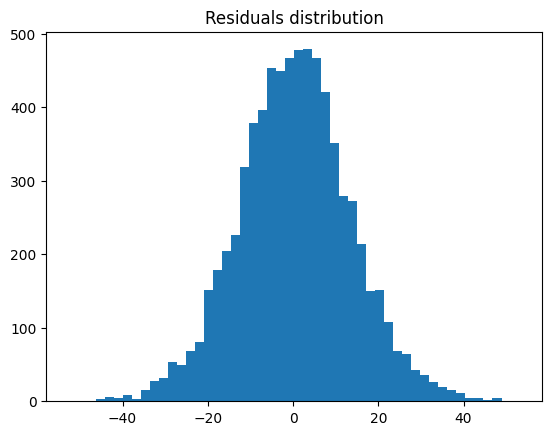

In [314]:
import matplotlib.pyplot as plt
residuals = y_test - preds
plt.hist(residuals, bins=50)
plt.title("Residuals distribution")
plt.show()

In [380]:
games["GAME_DATE"] = pd.to_datetime(games["GAME_DATE"])

def get_last_row(team_abbr, as_of_date, df):
    team_df = df[(df["TEAM_ABBREVIATION"] == team_abbr) & 
                 (df["GAME_DATE"] < as_of_date)].sort_values("GAME_DATE")
    if len(team_df) == 0:
        raise ValueError(f"No games found for {team_abbr} before {as_of_date}")
    return team_df.iloc[-1]

def build_matchup_features(home_abbr, away_abbr, game_date, df):
    if isinstance(game_date, str):
        game_date = pd.to_datetime(game_date)

    home_row = get_last_row(home_abbr, game_date, df)
    away_row = get_last_row(away_abbr, game_date, df)

    feat = {"HOME_TEAM": 1}  # home flag = 1
    for m in base_metrics:
        # difference = team - opponent
        feat[m + "_DIFF"] = home_row[m] - away_row[m]

    return pd.DataFrame([feat])[features]

home_team = "DEN"
away_team = "HOU"
game_date = "2025-12-15"
market_line = 1.5 # how much is home team favored (if away favored, put a negative)

X_new = build_matchup_features(home_team, away_team, game_date, games)
predicted_diff = pipe_lgbm.predict(X_new)[0]
predicted_spread = -predicted_diff
#find a way to add a new csv with the last game included in rolling calculations

print(f"Predicted difference on {game_date}:")
print(f"Model says home − away = {predicted_diff:+.2f}")
print("\n" + f"Equivalent book line:  {home_team} {predicted_spread:+.2f}")
print(f"Equivalent book line 2:  {away_team} {predicted_diff:+.2f}")

# Monte Carlo simulation
num_sims = 30000
sims = np.random.normal(loc=predicted_diff, scale=rmse, size=num_sims)

print(f"Model mean pred = {predicted_diff:.2f}, rmse≈{rmse:.2f}" + "\n\n")
if(market_line > 0):
    prob_over_spread = np.mean(sims > market_line)
    prob_under_spread  = np.mean(sims < market_line)
    print(f"Prob {home_team} -{market_line} (wins by more than {market_line}): {prob_over_spread:.2%}")
    print(f"Prob {away_team} {market_line:+} (wins outright or loses by less than {market_line}): {prob_under_spread:.2%}")
else:
    prob_over_spread = np.mean(sims < market_line)
    prob_under_spread  = np.mean(sims > market_line)
    print(f"Prob {away_team} {market_line} (wins by more than {-market_line}): {prob_over_spread:.2%}")
    print(f"Prob {home_team} {-market_line:+} (wins outright or loses by less than {-market_line}): {prob_under_spread:.2%}")

Predicted difference on 2025-12-15:
Model says home − away = +2.90

Equivalent book line:  DEN -2.90
Equivalent book line 2:  HOU +2.90
Model mean pred = 2.90, rmse≈13.24


Prob DEN -1.5 (wins by more than 1.5): 53.84%
Prob HOU +1.5 (wins outright or loses by less than 1.5): 46.16%


/Users/aashivjain/Desktop/Projects/nba_betting_predictor/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
